In [1]:
%%capture
#!pip install geopandas #==1.0.1
!pip install mapclassify #sometimes have to install library which you get from https://pypi.org/

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [3]:
#!python --version
gpd.__version__

'1.1.1'

In [4]:
! wget -q -O Texas_County_Boundaries_4845315375211121464.zip https://raw.githubusercontent.com/Nemipatel210/GIS/6c673d7fa088d4803b52ba23025623d675de0a7f/Texas_County_Boundaries_4845315375211121464.zip

In [5]:
zip_ref = zipfile.ZipFile('Texas_County_Boundaries_4845315375211121464.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [6]:
!ls

County_Boundaries.cpg  County_Boundaries.shp.xml
County_Boundaries.dbf  County_Boundaries.shx
County_Boundaries.prj  sample_data
County_Boundaries.shp  Texas_County_Boundaries_4845315375211121464.zip


In [7]:
txC0=gpd.read_file('County_Boundaries.shp')

In [8]:
txC0.head(5)

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-10783021.183 3456095.21, -10783006...."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-10606980.495 3451945.262, -10606969..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-10706181.772 3456563.942, -10706152..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-11066621.012 3397753.016, -11066621..."


<Axes: >

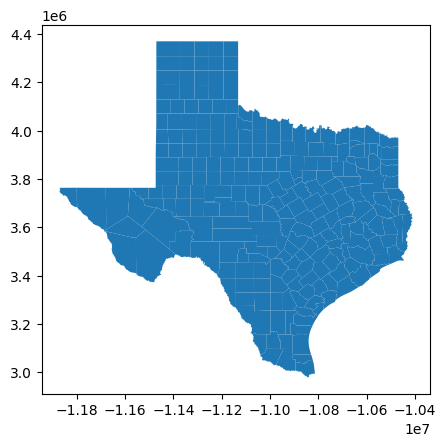

In [9]:
txC0.plot()

In [10]:
! wget -q -O  major_aquifers.zip https://github.com/Nemipatel210/GIS/raw/cc6822b8b6ef210cd2f80068cfac2233270ab5a6/major_aquifers.zip

In [11]:
zip_ref = zipfile.ZipFile('major_aquifers.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [12]:
task1=gpd.read_file('NEW_major_aquifers_dd.shp')

In [13]:
task1.dtypes

,0
AREA,float64
PERIMETER,float64
AQUIFER,int32
AQ_NAME,object
geometry,geometry


In [14]:
task1.head(5)

,AREA,PERIMETER,AQUIFER,AQ_NAME,geometry
0,0.075117,3.893477,1,SEYMOUR,"POLYGON ((-100.34871 35.00166, -100.35033 34.9..."
1,0.000541,0.141894,0,SEYMOUR,"POLYGON ((-100.04694 34.78674, -100.04631 34.7..."
2,0.000555,0.129224,0,SEYMOUR,"POLYGON ((-100.15418 34.78239, -100.15341 34.7..."
3,0.000843,0.172150,0,SEYMOUR,"POLYGON ((-100.2075 34.77535, -100.20682 34.77..."
4,0.034188,2.543279,1,SEYMOUR,"POLYGON ((-100.78374 34.6883, -100.78284 34.68..."


In [15]:
task1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AREA       139 non-null    float64 
 1   PERIMETER  139 non-null    float64 
 2   AQUIFER    139 non-null    int32   
 3   AQ_NAME    139 non-null    object  
 4   geometry   139 non-null    geometry
dtypes: float64(2), geometry(1), int32(1), object(1)
memory usage: 5.0+ KB


<Axes: >

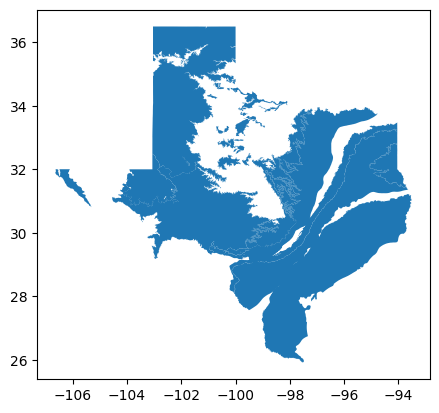

In [16]:
task1.plot()

/tmp/ipython-input-4072524178.py:26: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  task1.plot(


<Axes: >

Text(0.5, 1.0, 'Major Aquifers of Texas')

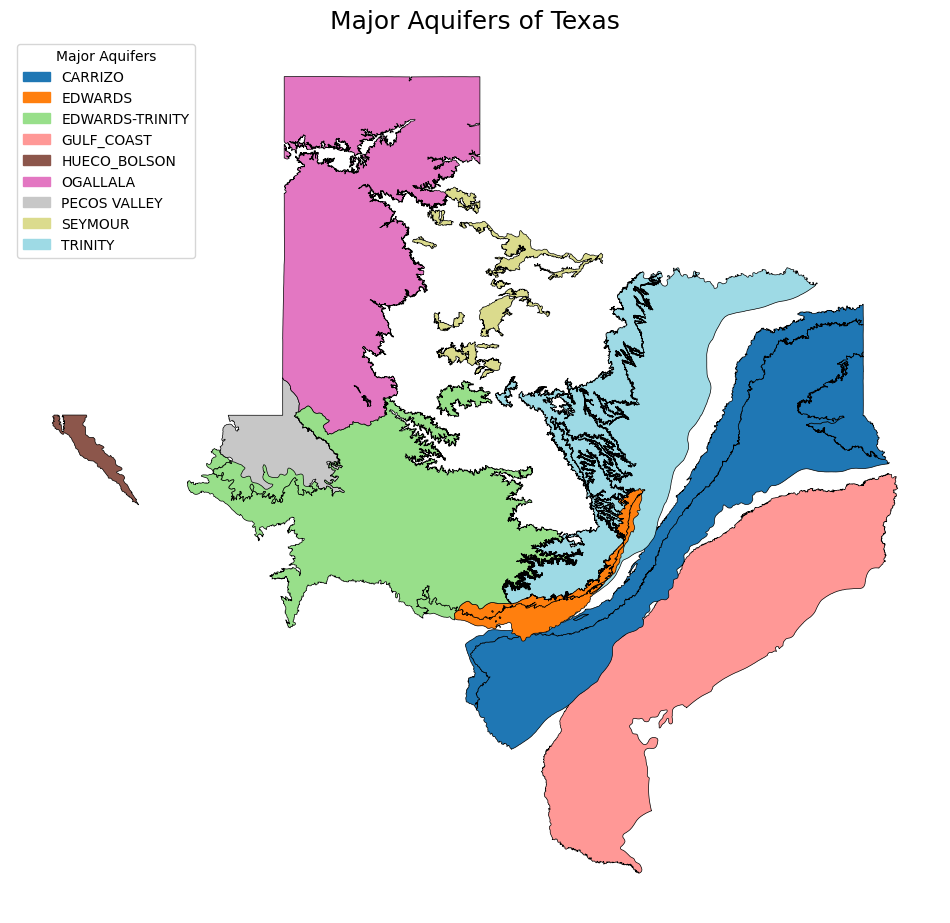

In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches # Import mpatches for custom legend

# Assuming 'last1' is your GeoDataFrame containing aquifer data

# Get unique aquifer names and sort them for consistent legend order
aquifer_names = sorted(task1['AQ_NAME'].unique())

# Create a color map with a unique color for each aquifer name
# Using a distinct colormap like 'tab20' or 'tab20b' for categorical data
# Using matplotlib.colormaps is the recommended way
cmap = plt.colormaps['tab20'].resampled(len(aquifer_names)) # Use plt.colormaps
# Access colors from the colormap object correctly
colors = [mcolors.rgb2hex(cmap.colors[i]) for i in range(len(aquifer_names))]

# Create a dictionary to map aquifer names to colors
color_map = dict(zip(aquifer_names, colors))

# --- Generate the Thematic Map ---

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the GeoDataFrame using the 'AQ_NAME' column and the custom color map
task1.plot(
    column='AQ_NAME',      # The column to use for coloring
    ax=ax,
    # legend=True, # Remove default legend creation
    categorical=True,      # Indicate that the data is categorical
    color=task1['AQ_NAME'].map(color_map), # Map aquifer names to colors
    edgecolor='black',     # Add a thin black edge to polygons
    linewidth=0.5,
    # legend_kwds are ignored when legend=False or removed
    # legend_kwds={
    #     'loc': 'upper left', # Adjust legend location as needed
    #     'title': 'Major Aquifers',
    #     'frameon': True
    # }
)

# --- Add a Custom Legend Manually ---

# Create a list of legend patches using the aquifer names and their assigned colors
patches = [mpatches.Patch(color=color_map[name], label=name) for name in aquifer_names]

# Add the legend to the axes
ax.legend(
    handles=patches,
    title='Major Aquifers',
    loc='upper left', # Adjust legend location as needed
    frameon=True,
    fontsize=10 # Adjust font size as needed
)


# Customize the map appearance
ax.set_title('Major Aquifers of Texas', fontsize=18)
ax.set_axis_off() # Hide the coordinate axes

plt.show()

In [18]:
! wget -q -O  minor_aquifers.zip https://github.com/Nemipatel210/GIS/raw/f84896650731c445abcd4bd27b36c5a98c74133d/minor_aquifers.zip

In [19]:
zip_ref = zipfile.ZipFile('minor_aquifers.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [20]:
task2 = gpd.read_file('Minor_Aquifers.shp')


In [21]:
task2.head(5)

,AQU_NAME,AQUIFER,Area_AQ,minorArea,geometry
0,CROSS TIMBERS,1,17790.136282,17790,"POLYGON ((4922684.08 20128079.738, 4922718.656..."
1,HICKORY,2,208.059393,208,"POLYGON ((5111829.178 19803789.725, 5223403.49..."
2,HICKORY,2,221.465669,221,"POLYGON ((5071119.859 19804385.581, 5190466.97..."
3,HICKORY,2,189.259268,189,"POLYGON ((5152234.076 19793825.198, 5235813.58..."
4,HICKORY,2,236.098979,236,"POLYGON ((5029810.443 19798768.314, 5176155.59..."


<Axes: >

Text(0.5, 1.0, 'Minor Aquifers of Texas')

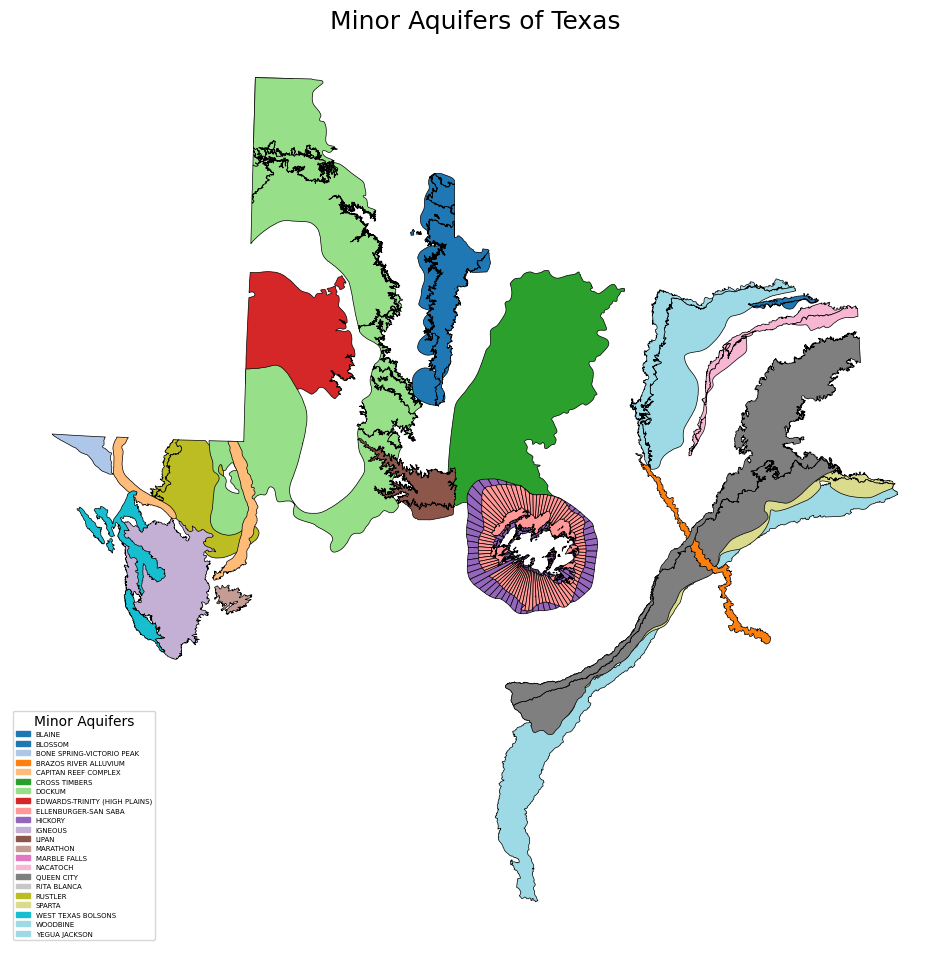

In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches # Import mpatches for custom legend

# Assuming 'task2' is your GeoDataFrame containing minor aquifer data

# Get unique aquifer names and sort them for consistent legend order
aquifer_names = sorted(task2['AQU_NAME'].unique())

# Create a color map with a unique color for each aquifer name
# Using a distinct colormap like 'tab20' or 'tab20b' for categorical data
# Using matplotlib.colormaps is the recommended way
cmap = plt.colormaps['tab20'].resampled(len(aquifer_names)) # Use plt.colormaps
# Access colors from the colormap object correctly
colors = [mcolors.rgb2hex(cmap.colors[i]) for i in range(len(aquifer_names))]

# Create a dictionary to map aquifer names to colors
color_map = dict(zip(aquifer_names, colors))

# --- Generate the Thematic Map ---

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the GeoDataFrame using the 'AQU_NAME' column and the custom color map
task2.plot(
    # column='AQU_NAME',      # The column to use for coloring - Removed this line
    ax=ax,
    # legend=True, # Remove default legend creation
    categorical=True,      # Indicate that the data is categorical
    color=task2['AQU_NAME'].map(color_map), # Map aquifer names to colors
    edgecolor='black',     # Add a thin black edge to polygons
    linewidth=0.5,
    # legend_kwds are ignored when legend=False or removed
    # legend_kwds={
    #     'loc': 'upper left', # Adjust legend location as needed
    #     'title': 'Major Aquifers',
    #     'frameon': True
    # }
)

# --- Add a Custom Legend Manually ---

# Create a list of legend patches using the aquifer names and their assigned colors
patches = [mpatches.Patch(color=color_map[name], label=name) for name in aquifer_names]

# Add the legend to the axes
ax.legend(
    handles=patches,
    title='Minor Aquifers',
    loc='lower left', # Adjust legend location as needed
    frameon=True,
    fontsize=5 # Adjust font size as needed
)


# Customize the map appearance
ax.set_title('Minor Aquifers of Texas', fontsize=18)
ax.set_axis_off() # Hide the coordinate axes

plt.show()

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Major Aquifers of Texas with County Boundaries Overlay')

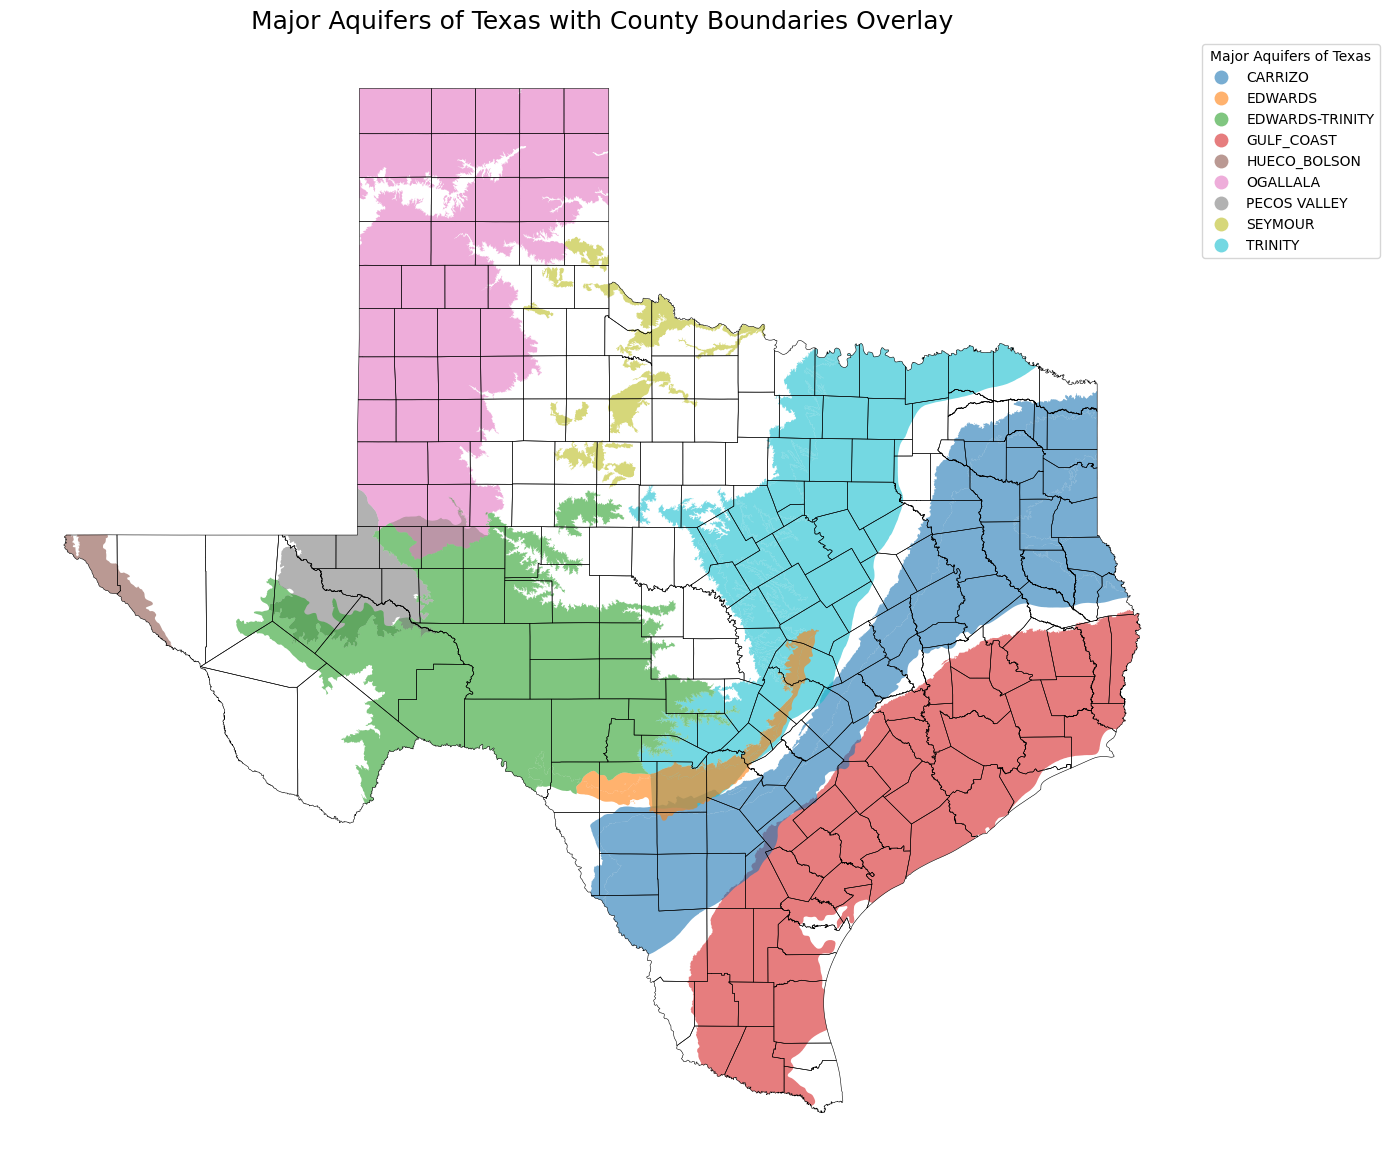

In [23]:
if txC0.crs != task1.crs:
    # Reproject the aquifer data to match the county data's CRS
    aquifer_data = task1.to_crs(txC0.crs)

# --- 3. Plotting the Overlay Map ---

# Set up the figure and axes for plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

# PLOT 1: Plot the Aquifer Polygons (The colored areas)
# Use the 'AQ_NAME' column to color-code the different aquifers
aquifer_data.plot(
    column='AQ_NAME',
    ax=ax,
    legend=True,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1), # Position the legend outside the map
        'title': "Major Aquifers of Texas"
    },
    alpha=0.6,          # Semi-transparent fill to hint at overlap
    edgecolor='none'    # No outline on the aquifer polygons
)

# PLOT 2: Plot the Texas County Boundaries (The boundary lines)
txC0.plot(
    ax=ax,
    facecolor='none',  # No fill color, so the aquifers show through
    edgecolor='black', # Color of the county boundary lines
    linewidth=0.4      # Line thickness
)

# Optional: Add title and clean up the plot
ax.set_title('Major Aquifers of Texas with County Boundaries Overlay', fontsize=18)
ax.set_axis_off() # Hide the coordinate axes

plt.tight_layout() # Adjust layout to make room for the legend
plt.show()

In [24]:
joined_data = gpd.sjoin(
    left_df=txC0,
    right_df=task1[['AQ_NAME', 'geometry']], # Only keep the aquifer name
    how="left",
    predicate='intersects'
)

/tmp/ipython-input-3838206320.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4269

  joined_data = gpd.sjoin(


In [25]:
if txC0.crs != task1.crs:
    task1 = task1.to_crs(txC0.crs)
    print(f"Reprojected aquifer_data to {txC0.crs}")


Reprojected aquifer_data to EPSG:3857


In [26]:
joined_data = gpd.sjoin(
    left_df=txC0,
    right_df=task1[['AQ_NAME', 'geometry']], # Only keep the aquifer name
    how="left",
    predicate='intersects'
)

In [27]:
# Display the first few rows of the joined data
display(joined_data.head())

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,index_right,AQ_NAME
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452...",54.0,CARRIZO
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452...",108.0,TRINITY
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452...",135.0,EDWARDS
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452...",134.0,EDWARDS
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452...",133.0,EDWARDS


In [28]:
print("\n--- Example Analysis: Counties by Aquifer ---")
# Count how many rows (county/aquifer overlaps) there are for each aquifer name
analysis_result = joined_data.groupby('AQ_NAME')['CNTY_NM'].count().reset_index()
analysis_result.columns = ['Aquifer Name', 'Number of County Overlaps']
print(analysis_result)


--- Example Analysis: Counties by Aquifer ---
      Aquifer Name  Number of County Overlaps
0          CARRIZO                        110
1          EDWARDS                         46
2  EDWARDS-TRINITY                         67
3       GULF_COAST                         56
4     HUECO_BOLSON                          2
5         OGALLALA                         59
6     PECOS VALLEY                         12
7          SEYMOUR                         53
8          TRINITY                        158


<Axes: >

Text(0.5, 1.0, 'Texas Counties Colored by Intersecting Major Aquifer')

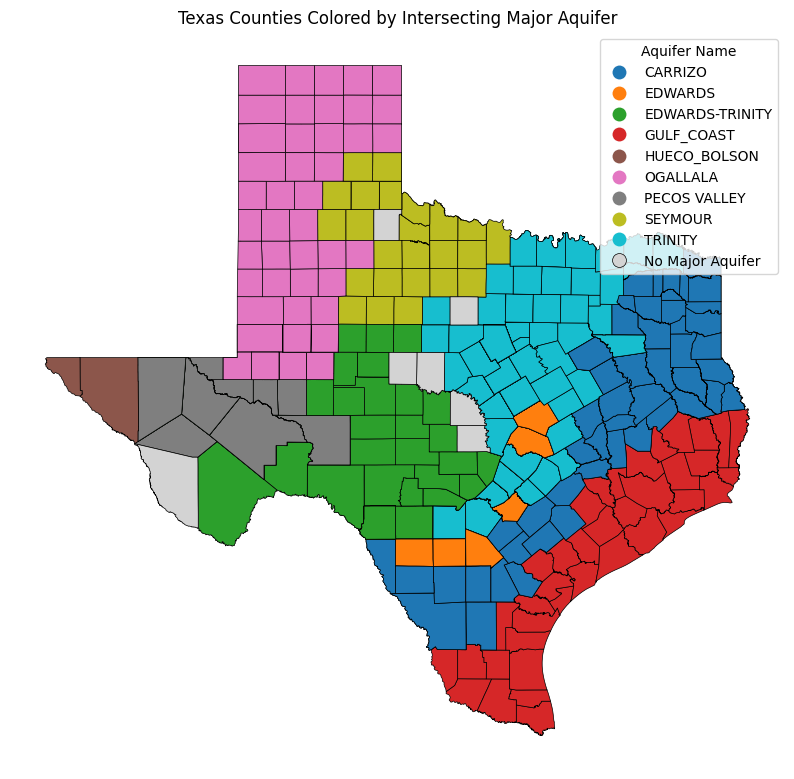

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the counties, colored by the joined aquifer name
joined_data.plot(
    column='AQ_NAME',
    ax=ax,
    legend=True,
    legend_kwds={'title': "Aquifer Name"},
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey', 'label': 'No Major Aquifer'} # Color counties with no overlap
)

ax.set_title('Texas Counties Colored by Intersecting Major Aquifer')
ax.set_axis_off()
plt.show()

In [31]:
if txC0.crs != task2.crs:
    task2= task2.to_crs(txC0.crs)
    print(f"Reprojected aquifer_data to {txC0.crs}")


Reprojected aquifer_data to EPSG:3857


In [32]:
joined_data_minor = gpd.sjoin(
    left_df=txC0,
    right_df=task2[['AQU_NAME', 'geometry']], # Only keep the aquifer name
    how="left",
    predicate='intersects'
)

In [33]:
display(joined_data_minor.head())

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,index_right,AQU_NAME
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452...",NaN,NaN
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-10783021.183 3456095.21, -10783006....",79.0,YEGUA JACKSON
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-10606980.495 3451945.262, -10606969...",NaN,NaN
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-10706181.772 3456563.942, -10706152...",NaN,NaN
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-11066621.012 3397753.016, -11066621...",NaN,NaN


In [34]:
print("\n--- Example Analysis: Counties by Aquifer ---")
# Count how many rows (county/aquifer overlaps) there are for each aquifer name
analysis_result = joined_data_minor.groupby('AQU_NAME')['CNTY_NM'].count().reset_index()
analysis_result.columns = ['Aquifer Name', 'Number of County Overlaps']
print(analysis_result)


--- Example Analysis: Counties by Aquifer ---
                     Aquifer Name  Number of County Overlaps
0                          BLAINE                         29
1                         BLOSSOM                         11
2       BONE SPRING-VICTORIO PEAK                          1
3           BRAZOS RIVER ALLUVIUM                         13
4            CAPITAN REEF COMPLEX                          9
5                   CROSS TIMBERS                         31
6                          DOCKUM                        103
7   EDWARDS-TRINITY (HIGH PLAINS)                         16
8            ELLENBURGER-SAN SABA                        269
9                         HICKORY                        290
10                        IGNEOUS                          6
11                          LIPAN                         12
12                       MARATHON                          1
13                   MARBLE FALLS                         54
14                       NACATOCH     

<Axes: >

Text(0.5, 1.0, 'Texas Counties Colored by Intersecting Minor Aquifer')

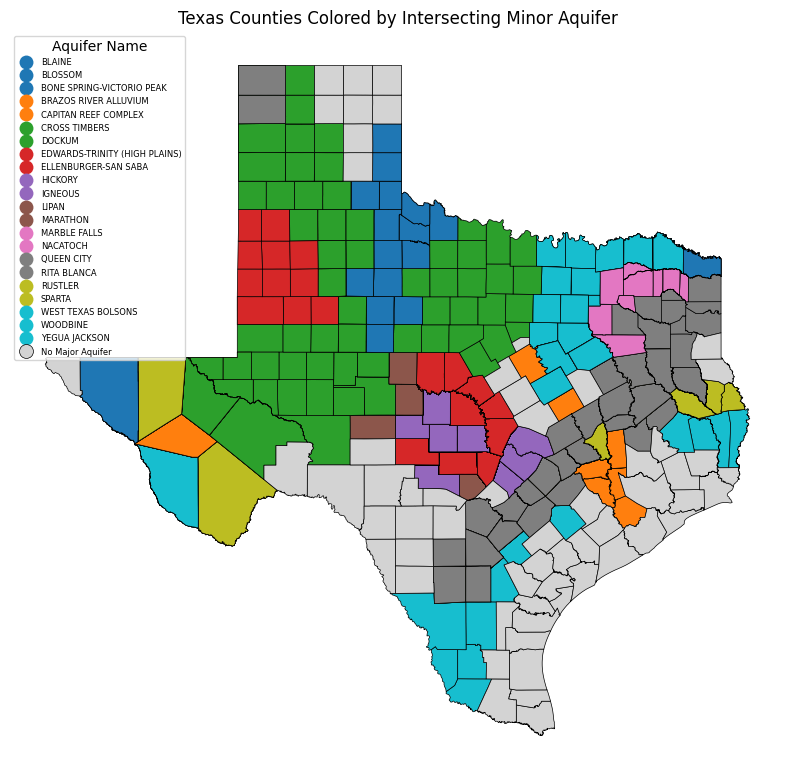

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the counties, colored by the joined aquifer name
joined_data_minor.plot(
    column='AQU_NAME',
    ax=ax,
    legend=True,
    legend_kwds={'title': "Aquifer Name", 'fontsize': 6, 'loc': 'upper left'}, # Reduced fontsize
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey', 'label': 'No Major Aquifer'} # Color counties with no overlap
)

ax.set_title('Texas Counties Colored by Intersecting Minor Aquifer')
ax.set_axis_off()
plt.show()